<a href="https://colab.research.google.com/github/GenAIUnplugged/tensorflow_series/blob/main/CNN_Model_Architectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
labels = np.unique(y_train)

In [6]:
len(labels)

10

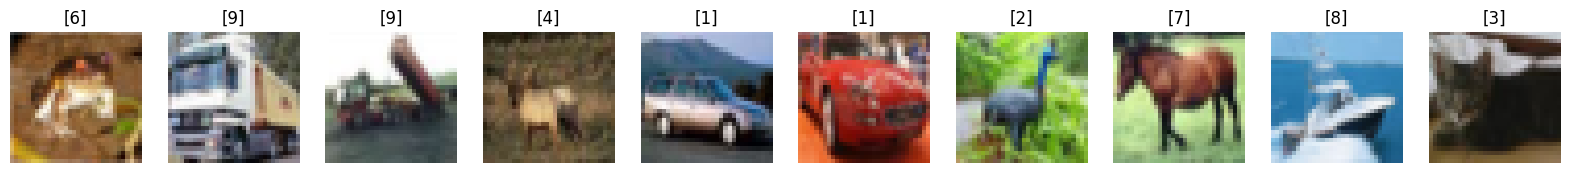

In [7]:
plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(x_train[i],cmap="gray")
  plt.title(f"{y_train[i]}")
  plt.axis('off')
plt.show()

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255.0
x_test = x_test/255.0

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization

#Model 1

In [10]:
model1 = Sequential()
model1.add(BatchNormalization(input_shape=(32,32,3)))
model1.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(units=128,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units=10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 32, 32, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,734 (1.20 MB)

 Trainable params: 315,728 (1.20 MB)

 Non-trainable params: 6 (24.00 B)

In [12]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
history = model1.fit(x_train,y_train,batch_size=128,epochs=15,validation_split=0.2)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.3604 - loss: 1.7524 - val_accuracy: 0.5641 - val_loss: 1.2659
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5904 - loss: 1.1657 - val_accuracy: 0.6394 - val_loss: 1.0290
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6567 - loss: 0.9832 - val_accuracy: 0.6727 - val_loss: 0.9392
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6902 - loss: 0.8872 - val_accuracy: 0.6864 - val_loss: 0.8972
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7186 - loss: 0.7976 - val_accuracy: 0.6948 - val_loss: 0.8687
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7462 - loss: 0.7206 - val_accuracy: 0.7052 - val_loss: 0.8501
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7709 - loss: 0.6423 - val_accuracy: 0.7087 - val_loss: 0.8383
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7921 - loss: 0.5912 - val_accuracy: 

In [15]:
loss,acc = model1.evaluate(x_test,y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7086 - loss: 1.0155
Loss: 1.0475013256072998
Accuracy: 0.7067999839782715


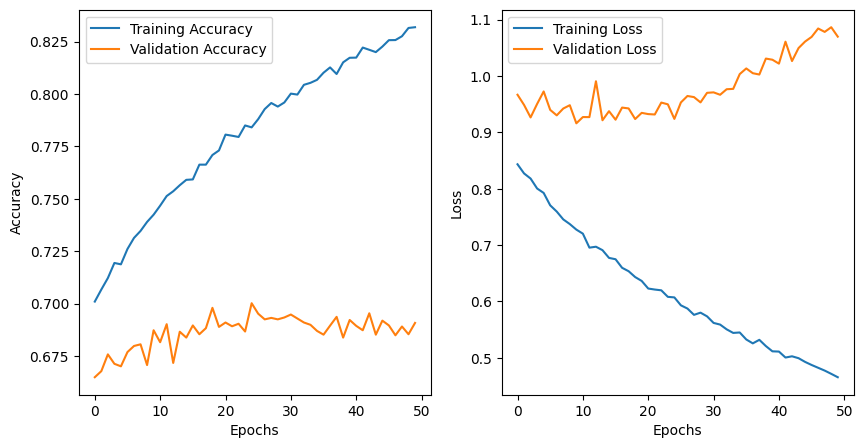

In [65]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'],label='Training Accuracy')
plt.plot(history2.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history2.history['loss'],label='Training Loss')
plt.plot(history2.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model 2

In [26]:
model2 = Sequential([
    BatchNormalization(input_shape=(32,32,3)),

    Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    # Reduced pool_size from 3 to 2
    MaxPooling2D(pool_size=2),

    Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    # Reduced pool_size from 3 to 2
    MaxPooling2D(pool_size=2),

    Conv2D(filters=16,kernel_size=(3,3),activation='relu'),
    # Reduced pool_size from 3 to 2
    MaxPooling2D(pool_size=2),

    Flatten(),

    #fully connected layer
    Dense(units=64,activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=16,activation='relu'),

    #classification layer
    Dense(units=10,activation='softmax')
])

In [27]:
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_6           │ (None, 32, 32, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 13, 13, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,830 (124.34 KB)

 Trainable params: 31,824 (124.31 KB)

 Non-trainable params: 6 (24.00 B)

In [28]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
history2 = model2.fit(x_train,y_train,batch_size=128,epochs=50,validation_split=0.2)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7038 - loss: 0.8361 - val_accuracy: 0.6649 - val_loss: 0.9667
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7069 - loss: 0.8264 - val_accuracy: 0.6678 - val_loss: 0.9486
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7164 - loss: 0.8102 - val_accuracy: 0.6758 - val_loss: 0.9265
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7231 - loss: 0.7869 - val_accuracy: 0.6713 - val_loss: 0.9504
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7236 - loss: 0.7843 - val_accuracy: 0.6701 - val_loss: 0.9726
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7282 - loss: 0.7600 - val_accuracy: 0.6769 - val_loss: 0.9399
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7356 - loss: 0.7516 - val_accuracy: 0.6798 - val_loss: 0.9302
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7365 - loss: 0.7363 - val_accuracy: 0.

In [34]:
loss,acc = model2.evaluate(x_test,y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6905 - loss: 1.0855
Loss: 1.1020686626434326
Accuracy: 0.6887999773025513


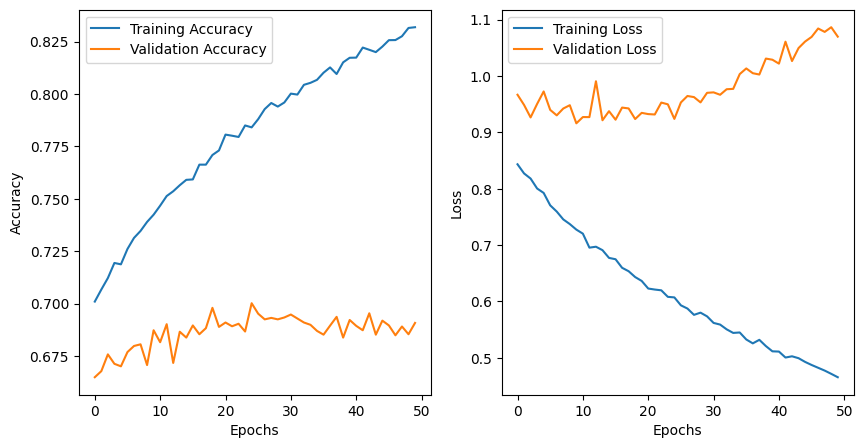

In [64]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'],label='Training Accuracy')
plt.plot(history2.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history2.history['loss'],label='Training Loss')
plt.plot(history2.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model 3

In [48]:
model3 = Sequential([
    BatchNormalization(input_shape=(32,32,3)),

    Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'), # Changed to 'same'
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'), # Changed to 'same'
    MaxPooling2D(pool_size=2),

    Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'), # Changed to 'same'
    MaxPooling2D(pool_size=2),

    Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'), # Changed to 'same'
    MaxPooling2D(pool_size=2),

    Flatten(),

    #fully connected layer
    Dense(units=128,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=16,activation='relu'),

    #classification layer
    Dense(units=10,activation='softmax')
])

In [49]:
model3.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_11          │ (None, 32, 32, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 530,662 (2.02 MB)

 Trainable params: 530,656 (2.02 MB)

 Non-trainable params: 6 (24.00 B)

In [50]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model3.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [51]:
history3 = model3.fit(x_train,y_train,batch_size=128,epochs=50,validation_split=0.2)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step - accuracy: 0.2052 - loss: 2.1372 - val_accuracy: 0.3970 - val_loss: 1.6915
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4910 - loss: 1.3996 - val_accuracy: 0.6038 - val_loss: 1.1502
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6252 - loss: 1.0603 - val_accuracy: 0.6729 - val_loss: 0.9441
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6987 - loss: 0.8546 - val_accuracy: 0.7056 - val_loss: 0.8611
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7477 - loss: 0.7152 - val_accuracy: 0.7117 - val_loss: 0.8390
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7939 - loss: 0.5895 - val_accuracy: 0.7264 - val_loss: 0.8440
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8321 - loss: 0.4870 - val_accuracy: 0.7414 - val_loss: 0.8096
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8709 - loss: 0.3740 - val_accuracy: 

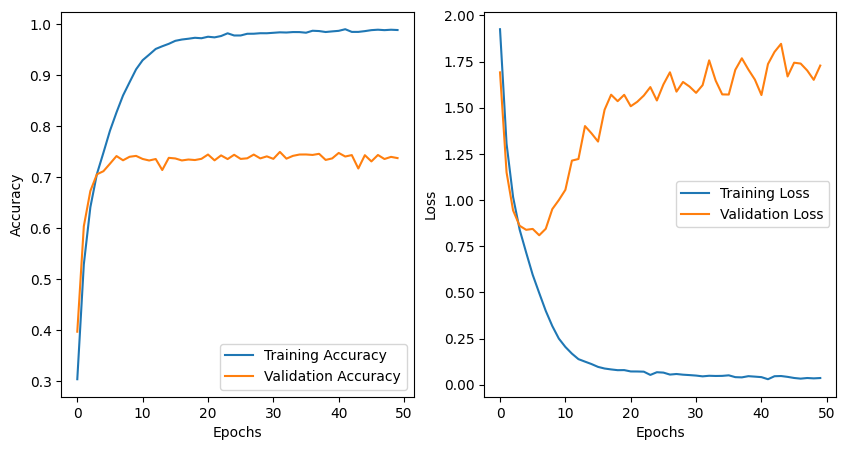

In [63]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history3.history['accuracy'],label='Training Accuracy')
plt.plot(history3.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history3.history['loss'],label='Training Loss')
plt.plot(history3.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [53]:
loss,acc = model3.evaluate(x_test,y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7337 - loss: 1.7545
Loss: 1.7856711149215698
Accuracy: 0.7278000116348267


# Model 4

In [57]:
base_model.trainable = False

In [79]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

model4 = Sequential([
    BatchNormalization(input_shape=(32,32,3)),

    Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'), # Changed to 'same'
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'), # Changed to 'same'
    MaxPooling2D(pool_size=2),

    Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'), # Changed to 'same'
    MaxPooling2D(pool_size=2),

    Conv2D(filters=256,kernel_size=(3,3),activation='relu',padding='same'), # Changed to 'same'
    MaxPooling2D(pool_size=2),

    GlobalAveragePooling2D(),

    #fully connected layer
    Dense(units=128,activation='relu'),
    Dense(units=64,activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=16,activation='relu'),

    #classification layer
    Dense(units=10,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [80]:
model4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [81]:
history4 = model4.fit(x_train,y_train,batch_size=128,epochs=20,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.2011 - loss: 2.0418 - val_accuracy: 0.3963 - val_loss: 1.6643
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4517 - loss: 1.4454 - val_accuracy: 0.5363 - val_loss: 1.2661
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5790 - loss: 1.1499 - val_accuracy: 0.6389 - val_loss: 1.0096
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6669 - loss: 0.9334 - val_accuracy: 0.6780 - val_loss: 0.9139
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7216 - loss: 0.7910 - val_accuracy: 0.7167 - val_loss: 0.8118
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7663 - loss: 0.6679 - val_accuracy: 0.7280 - val_loss: 0.7834
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8012 - loss: 0.5663 - val_accuracy: 0.7507 - val_loss: 0.7408
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8361 - loss: 0.4796 - val_accuracy: 

In [82]:
loss,acc = model4.evaluate(x_test,y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7600 - loss: 0.7191
Loss: 0.7348369359970093
Accuracy: 0.755299985408783


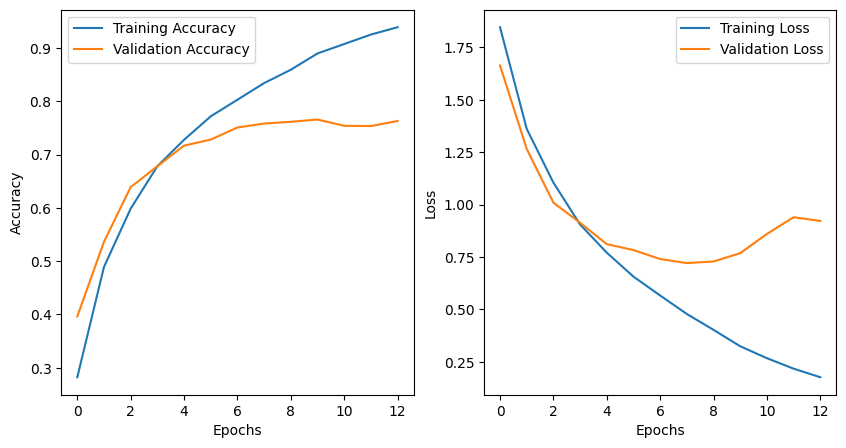

In [83]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history4.history['accuracy'],label='Training Accuracy')
plt.plot(history4.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history4.history['loss'],label='Training Loss')
plt.plot(history4.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [115]:
x_test_pred = model4.predict(np.expand_dims(x_test[34], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [116]:
cifar10_class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [117]:
cifar10_class_names[np.argmax(x_test_pred)]

'truck'

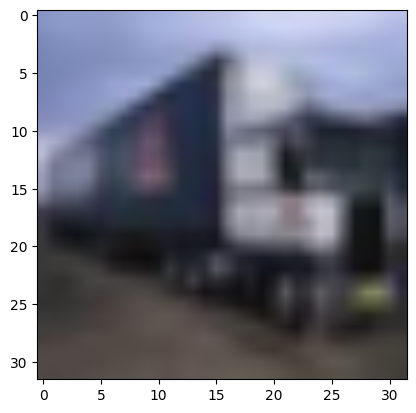

In [118]:
plt.imshow(x_test[34],interpolation='bilinear')